# Training Machine Learning Algorithms for Classifications

An introduction to linear classifiers in machine learning.

## Rosenblatt's Perceptron Rule
Overview: 
For a dataset with features $\textbf{x} = (x_1, x_2, ... , x_n)$, we want to find weights $\textbf{w} = (w_1, w_2, ... , w_n)$ such that the scalar quantity $\textbf{x} \cdot \textbf{w}$ provides meaningful insight as to the classification of the item in the dataset.

Procedure: 
1. For some cutoff value $\theta$, if $\textbf{x} \cdot \textbf{w} > \theta$ we classify the item with features $\textbf{x}$ as type A and otherwise we classify the item as type B. 
2. Check the classification accuracy (various methods of doing this exist), and adjust the weights $\textbf{w}$ as needed.
3. Repeat until a preset stopping point is reached.


### Implementation

1. We need a way to compute the value of $\textbf{x} \cdot \textbf{w}$. For simplicity, we can set $w_0 = -\theta$ and $x_0 = 1$ so that we will always be comparing $\textbf{x} \cdot \textbf{w}$ to zero instead of $\theta$.
```python
def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
```
2. We need a way to classify an item based on the value returned by ```net_input```.
```python
def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)
```
3. We need to initilize the perceptron object with the desired hyperparameter.
```python
def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta         # Learning Rate, 0.0 < eta < 1.0
        self.n_iter = n_iter   # Number of iterations
```
4. Lastly, we need a way to implement these features and adjust the weights to maximize the classification accuracy. The weight adjustment is performed according to the perceptron rule:
$$w_j\equiv w_j + \eta\left(y^{(i)}-\hat{y}^{(i)}\right)x_j^{(i)}$$
```python
def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])       # Initialize weights to zero
        self.errors_ = []
        for _ in range(self.n_iter):
                errors = 0
                for xi, target in zip(X, y):     # Apply perceptron rule
                        update = self.eta * (target - self.predict(xi))
                        self.w_[1:] += update * xi
                        self.w_[0] += update
                        errors += int(update != 0.0)
                self.errors_.append(errors)      # Record misclassifications
        return self         
```

We can build the ```Perceptron``` Class and give it the above characteristics.

In [9]:
import numpy as np

""" Define the Perceptron Class """
class Perceptron(object):
    """ Initialize Perceptron with desired hyperparameters """
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter
    
    """ Fit dataset, compute errors, update weights """
    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        #print(_)
        return self
    
    """ Use matrix multiplication to compute x.w for whole dataset"""
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    """ Classify item based on value of x.w """
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

### Aplication
We can now use the perceptron framework to work with the iris dataset.

In [3]:
import pandas as pd

""" Import iris dataset, load into DF, create data subset and labels """
iris_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df = pd.read_csv(iris_url, header=None)

#X = df.iloc[0:100, [0, 1, 2]].values
X = df.iloc[0:100, [0, 2]].values
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

""" Sanity checks for output """
df.head()
print("X=\n", X[0:5])
print("y=\n", y[0:5])


X=
 [[ 5.1  1.4]
 [ 4.9  1.4]
 [ 4.7  1.3]
 [ 4.6  1.5]
 [ 5.   1.4]]
y=
 [-1 -1 -1 -1 -1]


Initialize and fit a perceptron

In [10]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X,y)
print("Weights: ", ppn.w_)
print("Errors: ", ppn.errors_)
print(y)
print(ppn.predict(X))

Weights:  [-0.4  -0.68  1.82]
Errors:  [2, 2, 3, 2, 1, 0, 0, 0, 0, 0]
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1]
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1]


Plot Number of misclassificaitons versus number of iterations

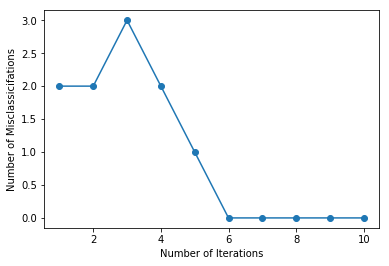

In [6]:
from matplotlib import pyplot as plt

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel("Number of Iterations")
plt.ylabel("Number of Misclassicifations")
plt.show()

## Adaptive Linear Neurons

Use same framework as the perceptron, but adjust the weights by minimizing cost functions with gradient descent
![alt text](02_09.png)

### Changes to the Perceptron Class
We can change the fit method so that the weights are updated based on the minimization of a cost function.
$$J(w) = \frac{1}{2}\sum_{i}\left(y^{(i)}-\phi(z^{(i)})\right)^2$$

We will still update the weights in the the same way: $\textbf{w}\equiv\textbf{w}+\Delta\textbf{w}$, but now we express the update to the weight $\Delta\textbf{w}$ via $\Delta\textbf{w}=-\eta\nabla J(\textbf{w})$. Thus, our rule becomes:
$$\textbf{w}\equiv\textbf{w}+\eta\sum_{i}\left(y^{(i)}-\phi(z^{(i)})\right)\textbf{x}^{(i)}$$

Incorporating this new method of updating the weights into our ```fit``` method, we can write
```python
def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])   #Start weights at zero
        self.cost_ = []
        for i in range(self.n_iter):
            output = self.net_input(X)       #Implement new rule
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0   #Keep track of cost
            self.cost_.append(cost)
        return self
```

### Implementation

Now we can construct the ```AdalineGD``` class to incorporate cost fucntion minimization into our linear classifier:

In [11]:
class AdalineGD(object):
    def __init__(self, eta=0.01, n_iter=50):
        self.eta = eta
        self.n_iter = n_iter
        
    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, X):
        return self.net_input(X)
    
    def predict(self, X):
        return np.where(self.activation(X) >= 0.0, 1, -1)

Initialize, fit, and output the results of an Adaline classifier:

In [12]:
ada = AdalineGD(n_iter=10, eta=0.01)
ada.fit(X, y)
print("Weights: ", ada.w_)
print("Costs: ", ada.cost_)
print(y)
print(ada.predict(X))

Weights:  [ -3.79038389e+13  -2.11689469e+14  -1.18464807e+14]
Costs:  [50.0, 2230.8539602549999, 3475977.0425619674, 5423372722.5878296, 8461791557634.333, 13202470134517626.0, 2.0599091394023023e+19, 3.2139634624124605e+22, 5.0145712449819432e+25, 7.8239609955381231e+28]
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1]
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


And again we can plot the results. Here we also consider the effect of different values for the learning rate on classifier performance.

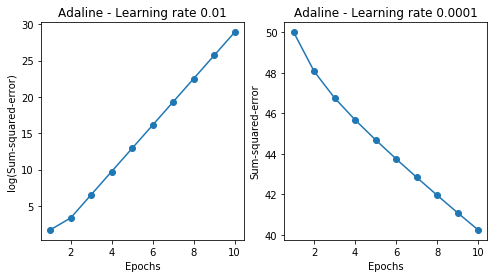

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')
ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')
plt.show()

The vastly different behavior of the classifier for the different values of the learning rate implies it would be useful to standardize our data. We can accomplish the standardization by subtracting the mean and dividing by the standard deviation:
$$\textbf{x}_j' = \frac{\textbf{x}_j - \mu_j}{\sigma_j}$$
Implemented in our code as follows:

In [14]:
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

Now we can plot the performance of the Adaline classifier again, and observe the convergence of the classification.

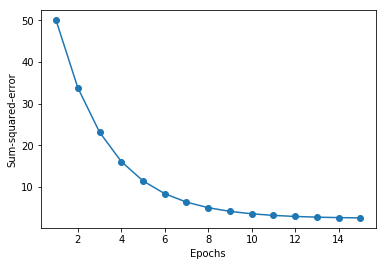

In [15]:
ada = AdalineGD(n_iter=15, eta=0.01)
ada.fit(X_std, y)
plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.show()

## Large Scale Machine Learning and Stochastic Gradient Descent

In practice, computing the gradient summing over the dataset can become computationally expensive as the problem size increases. For this method we make an approximation in the computation of the gradient descent:
$$\Delta\textbf{w} = \eta\sum_{i}\left(y^{(i)}-\phi(z^{(i)})\right)\textbf{x}^{(i)} \rightarrow \Delta\textbf{w} = \eta\left(y^{(i)}-\phi(z^{(i)})\right)\textbf{x}^{(i)}$$

The main difference between this method and the previous method that makes this approximation valid is that we present the data to the weights in randomized order. In this approach, the weights can be updated much more frequently, allowing the classifier to converge quickly, even in the case of a large problem size.

The method that randomizes the dataset is as follows:
```python
def _shuffle(self, X, y):
        r = np.random.permutation(len(y))
        return X[r], y[r]
```

These changes and two straightforward helper methods (```_update_weights``` and ```_initialize_weights```) make the fit method much simpler:
```python
def fit(self, X, y):
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost = []
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost)/len(y)
            self.cost_.append(avg_cost)
        return self
```

We can now build the ```AdalineSGD``` class by adding the above methods to our existing framework:

In [16]:
from numpy.random import seed

class AdalineSGD(object):
    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        if random_state:
            seed(random_state)
            
    def fit(self, X, y):
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost = []
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost)/len(y)
            self.cost_.append(avg_cost)
        return self
    
    def partial_fit(self, X, y):
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self
    
    def _shuffle(self, X, y):
        r = np.random.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        self.w_ = np.zeros(1 + m)
        self.w_initialized = True
        
    def _update_weights(self, xi, target):
        output = self.net_input(xi)
        error = (target - output)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error**2
        return cost
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, X):
        return self.net_input(X)
    
    def predict(self, X):
        return np.where(self.activation(X) >= 0.0, 1, -1)

Now we can initialize and fit an ```AdalineSGD``` object on the iris dataset:

In [17]:
ada = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada.fit(X_std, y)
ada.fit(X, y)
print("Weights: ", ada.w_)
print("Costs: ", ada.cost_)
print(y)
print(ada.predict(X))

Weights:  [-0.19467466 -0.35831322  0.80241818]
Costs:  [0.27423186997478516, 0.053086202251685373, 0.036615658917803676, 0.031356906331049393, 0.033461127522971819, 0.033945740289373146, 0.032792002737360007, 0.029884090884459012, 0.032688346890308709, 0.033992731622758995, 0.034053779224187515, 0.033539687442828703, 0.032960343116489495, 0.032847973903508507, 0.032798943561161115]
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1]
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1]


Lastly, we can plot the performance of this linear classifier and note the quickness of its convergence:

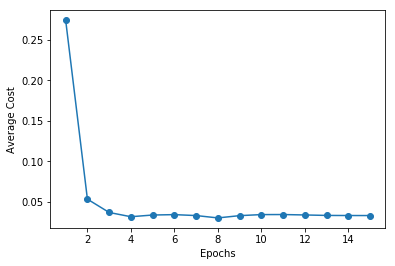

In [18]:
plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')
plt.show()